In [2]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
from IPython.display import display

In [3]:
def quantize_image(image_path, n_colors):
    # Download image
    image = Image.open(image_path)
    image = image.convert('RGB')

    # Image to numpy array
    np_image = np.array(image)
    w, h, d = np_image.shape

    # Array to 2 dimension
    np_image = np.reshape(np_image, (w * h, d))

    # k-means clusterisation
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(np_image)

    # Pixel quantization
    quantized_image = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = np.reshape(quantized_image, (w, h, d))
    quantized_image = quantized_image.astype(np.uint8)

    # Image return
    return Image.fromarray(quantized_image)

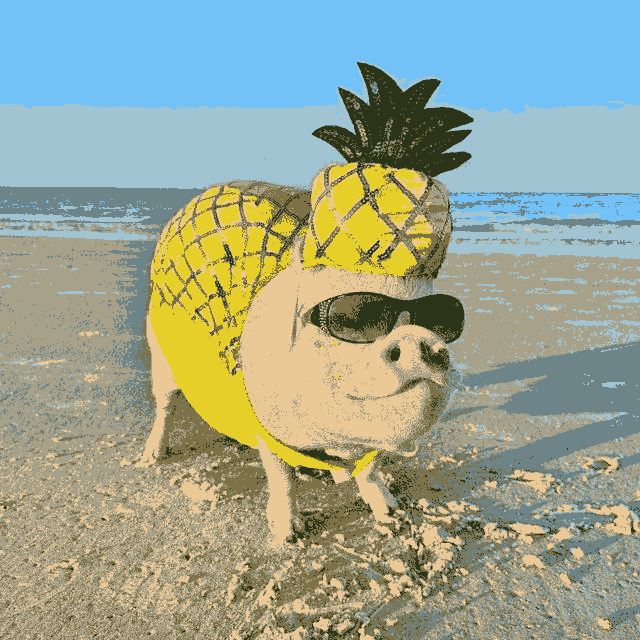

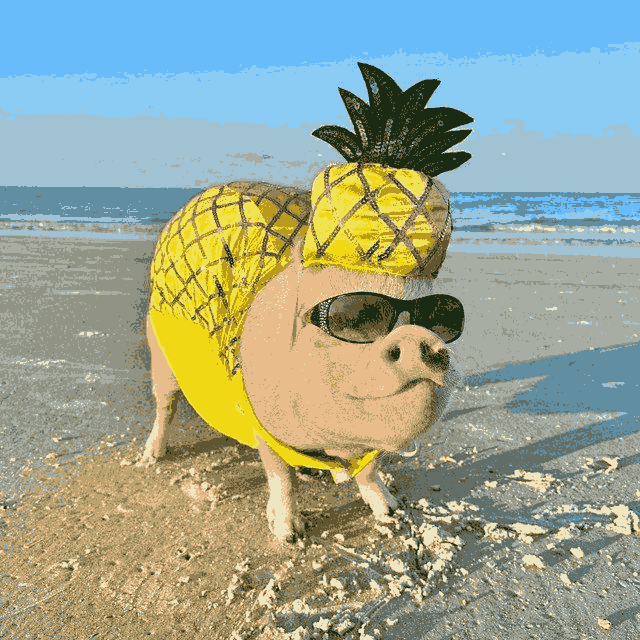

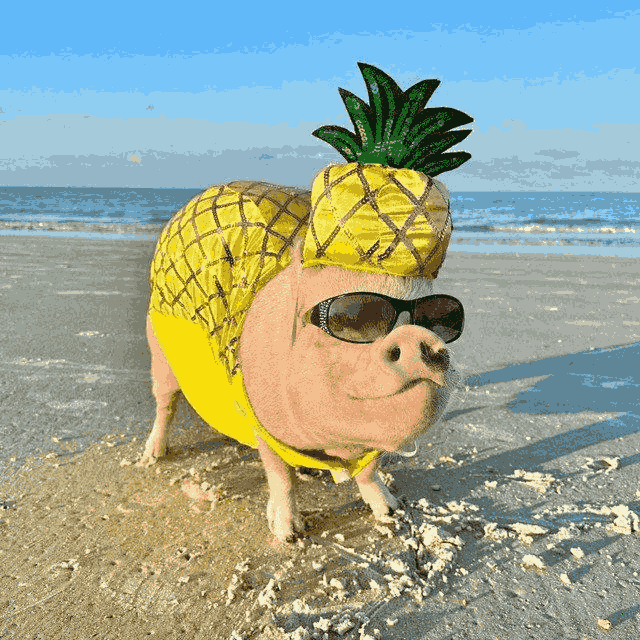

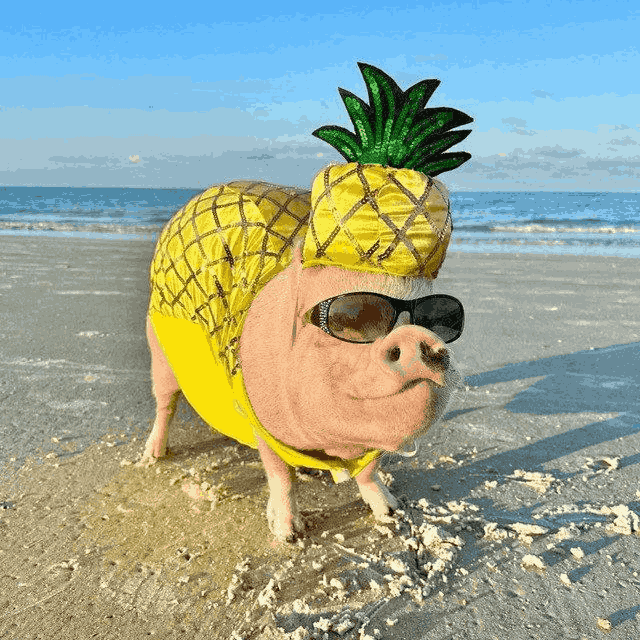

In [4]:
depths = [8, 16, 32, 64]
image_path = 'image.jpg'

for depth in depths:
    quantized_image = quantize_image(image_path, depth)
    display(quantized_image)